# ***Introduction***

Image segmentation is a fundamental task in computer vision that involves partitioning an image into multiple segments or regions based on certain characteristics such as color, intensity, or texture. This process plays a crucial role in various applications including medical image analysis, object detection and recognition, autonomous vehicles, and satellite image processing. By segmenting images, we can extract meaningful information, identify objects of interest, and facilitate further analysis and decision-making.

***Proposed Segmentation Project: Pet Semantic Segmentation using Oxford-IIIT Pet Dataset***

For my segmentation project, I've focused on pet semantic segmentation, utilizing the Oxford-IIIT Pet dataset. This dataset offers a rich collection of images featuring various pet species, meticulously annotated with pixel-level labels, making it an ideal resource for tasks like semantic segmentation in pet imagery.

The successful implementation of this project will advance pet semantic segmentation capabilities and facilitate the development of intelligent systems tailored for pet imagery analysis. The model's accurate segmentation capabilities can find applications in diverse domains such as veterinary medicine, pet behavior analysis, and pet-related services, ultimately enhancing the understanding and care of pets.

Through this project, I aim to leverage the rich insights provided by the Oxford-IIIT Pet dataset to address real-world challenges and foster innovation in pet image analysis and segmentation.

# ***Hands-on Basic Image Processing***

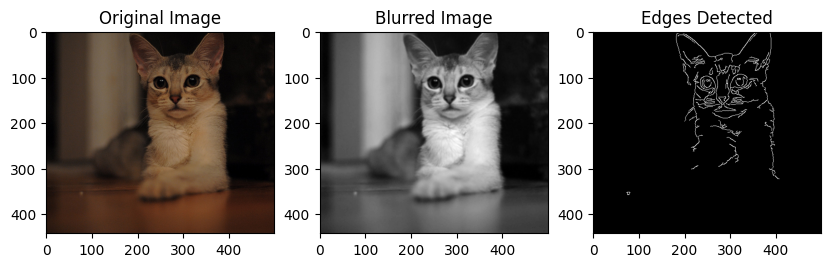

In [35]:
import cv2
from skimage import io
import matplotlib.pyplot as plt

# Load the sample image
image_path = "/content/Abyssinian_54.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform edge detection using Canny edge detector
edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

# Display the original image and processed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected")
plt.show()


Saving american_bulldog_89.jpg to american_bulldog_89.jpg


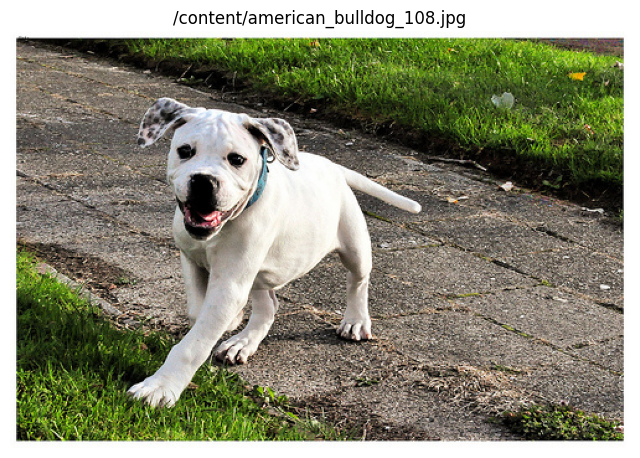

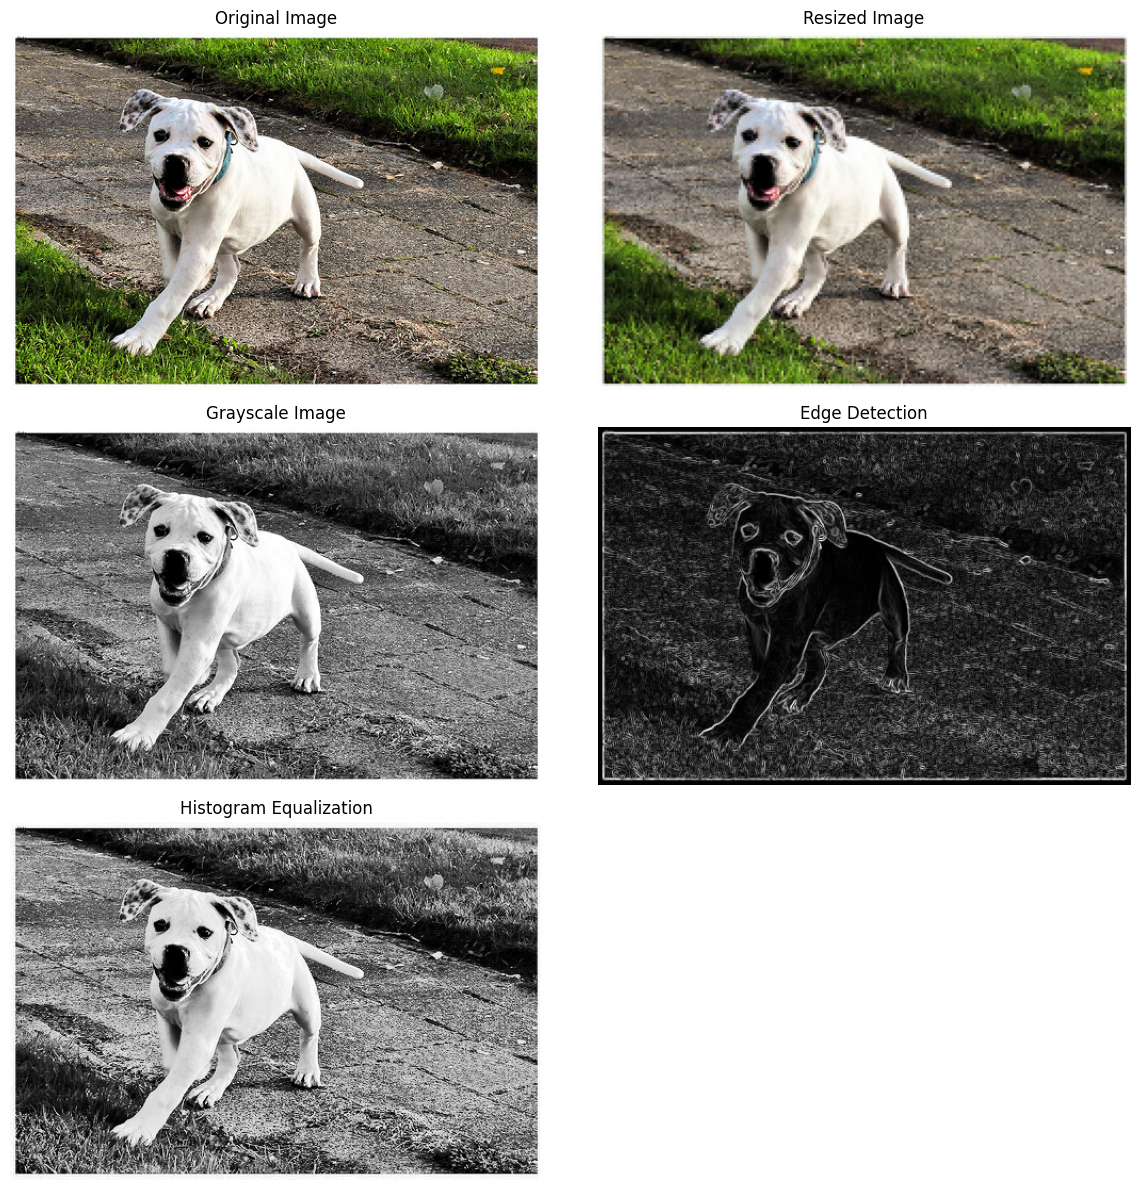

In [36]:
import cv2
import numpy as np
from skimage import io, color, filters, exposure
import matplotlib.pyplot as plt
from google.colab import files

# Function to load a sample image from the uploaded file
def load_sample_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        sample_image = cv2.imread(filename)
        sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
        return sample_image

# Load a sample image from the uploaded file
sample_image = load_sample_image()

# Display the original sample image
plt.figure(figsize=(8, 6))
plt.imshow(sample_image)
plt.title("/content/american_bulldog_108.jpg")
plt.axis("off")
plt.show()

# Basic image processing tasks
# Resize the image
resized_image = cv2.resize(sample_image, (sample_image.shape[1] // 2, sample_image.shape[0] // 2))

# Convert the image to grayscale
gray_image = cv2.cvtColor(sample_image, cv2.COLOR_RGB2GRAY)

# Apply edge detection
edges = filters.sobel(gray_image)

# Apply histogram equalization
equalized_image = exposure.equalize_hist(gray_image)

# Display the processed images in 3 or 4 rows side by side
plt.figure(figsize=(12, 12))

# Row 1: Original Image and Resized Image
plt.subplot(3, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(resized_image)
plt.title("Resized Image")
plt.axis("off")

# Row 2: Grayscale Image and Edge Detection
plt.subplot(3, 2, 3)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")

# Row 3: Histogram Equalization
plt.subplot(3, 2, 5)
plt.imshow(equalized_image, cmap='gray')
plt.title("Histogram Equalization")
plt.axis("off")

plt.tight_layout()
plt.show()


# ***Thresholding techniques***



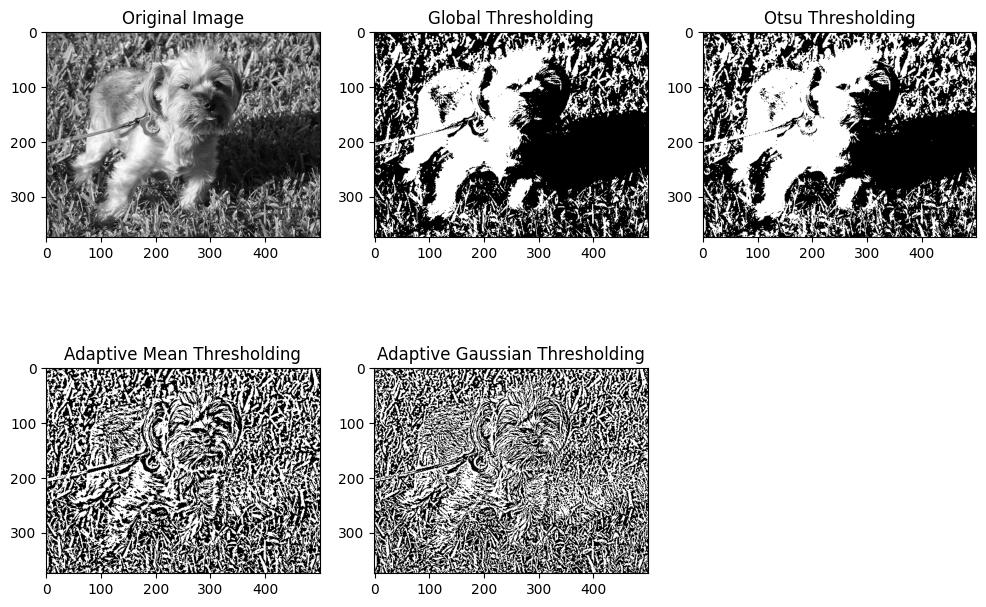

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from your dataset
image_path = "/content/yorkshire_terrier_198.jpg"
image = cv2.imread(image_path, 0)  # Read image in grayscale

# Apply various thresholding techniques
_, binary_global = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
binary_adaptive_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
binary_adaptive_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
_, binary_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plot the original and thresholded images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(binary_global, cmap='gray')
plt.title('Global Thresholding')

plt.subplot(2, 3, 3)
plt.imshow(binary_otsu, cmap='gray')
plt.title('Otsu Thresholding')

plt.subplot(2, 3, 4)
plt.imshow(binary_adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding')

plt.subplot(2, 3, 5)
plt.imshow(binary_adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding')

plt.show()

# ***Clustering Algorithms***

Saving Persian_44.jpg to Persian_44.jpg


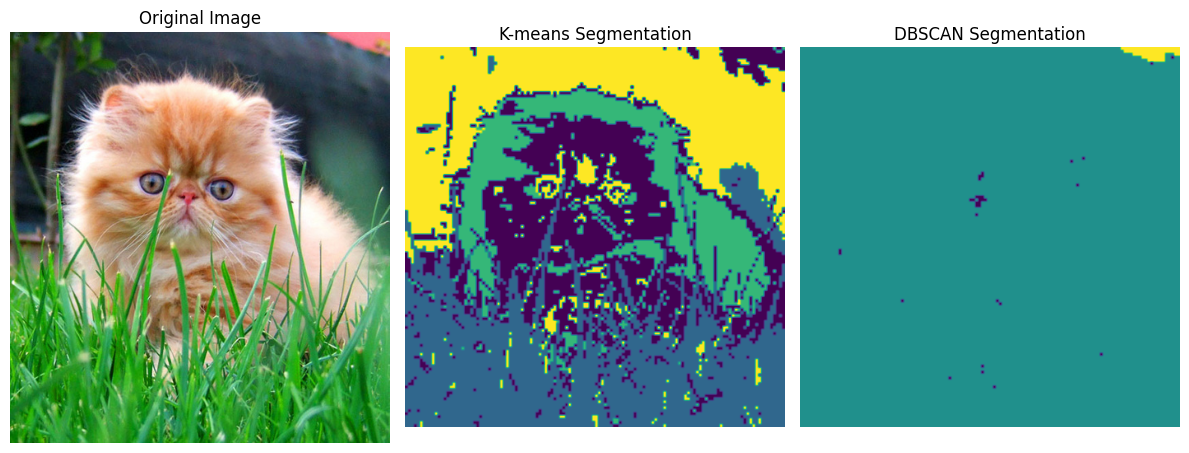

In [38]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Function to load a sample image from the uploaded file
def load_sample_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        sample_image = cv2.imread(filename)
        sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
        return sample_image

# Function to preprocess the image
def preprocess_image(image):
    # Resize the image to a smaller size for faster processing
    resized_image = cv2.resize(image, (128, 128))
    # Flatten the image to a 1D array
    flattened_image = resized_image.reshape(-1, 3)
    # Standardize the features by scaling them to have mean 0 and variance 1
    scaler = StandardScaler()
    scaled_image = scaler.fit_transform(flattened_image)
    return resized_image, scaled_image

# Load a sample image from the uploaded file
sample_image = load_sample_image()

# Preprocess the image
resized_image, processed_image = preprocess_image(sample_image)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(processed_image)
kmeans_labels = kmeans.labels_.reshape(resized_image.shape[:2])

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(processed_image)
dbscan_labels = dbscan.labels_.reshape(resized_image.shape[:2])

# Display the segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(kmeans_labels, cmap='viridis')
plt.title("K-means Segmentation")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(dbscan_labels, cmap='viridis')
plt.title("DBSCAN Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()


# ***Deep learning model- Unet***

## *Importing libraries*

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# If you hit a problem with checksums, you can execute the following line first
#!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums --datasets=oxford_iiit_pet:3.1.0

# download the dataset and get info
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteD3211Y/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteD3211Y/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


Let's briefly examine the contents of the dataset you just downloaded.

In [3]:
# see the possible keys we can access in the dataset dict.
# this contains the test and train splits.
print(dataset.keys())

dict_keys(['train', 'test'])


In [4]:
for image in dataset['train'].take(1):
    pass
image.keys()

dict_keys(['file_name', 'image', 'label', 'segmentation_mask', 'species'])

In [5]:
np.max(image['segmentation_mask'].numpy())

3

In [6]:
np.min(image['segmentation_mask'].numpy())

1

(array([ 55672.,      0.,      0.,      0.,      0., 169695.,      0.,
             0.,      0.,  24633.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

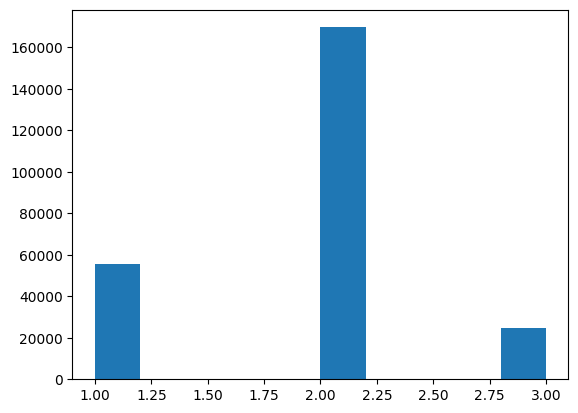

In [7]:
plt.hist(image['segmentation_mask'].numpy().reshape(-1))

In [8]:
# see information about the dataset
print(info)

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir=PosixGPath('/tmp/tmpdlxkvlw0tfds'),
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        '

## Prepare the Dataset

In [9]:
# Preprocessing Utilities
@tf.function
def random_flip(input_image, input_mask):
  '''does a random flip of the image and mask'''
  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  return input_image, input_mask

@tf.function
def normalize(input_image, input_mask):
  '''
  normalizes the input image pixel values to be from [0,1].
  subtracts 1 from the mask labels to have a range from [0,2]
  '''
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask


@tf.function
def load_image_train(datapoint):
  '''resizes, normalizes, and flips the training data'''
  input_image = tf.image.resize(datapoint['image'], (128, 128), method='nearest')
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128), method='nearest')
  input_image, input_mask = random_flip(input_image, input_mask)
  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

@tf.function
def load_image_test(datapoint):
  '''resizes and normalizes the test data'''
  input_image = tf.image.resize(datapoint['image'], (128, 128), method='nearest')
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128), method='nearest')
  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [10]:
# preprocess the train and test sets
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

Now that the splits are loaded, you can then prepare batches for training and testing.

In [11]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000

# shuffle and group the train set into batches
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# do a prefetch to optimize processing
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# group the test set into batches
test_dataset = test.batch(BATCH_SIZE)

In [12]:
# class list of the mask pixels
class_names = ['pet', 'background', 'outline']


def display_with_metrics(display_list, iou_list, dice_score_list):
  '''displays a list of images/masks and overlays a list of IOU and Dice Scores'''

  metrics_by_id = [(idx, iou, dice_score) for idx, (iou, dice_score) in enumerate(zip(iou_list, dice_score_list)) if iou > 0.0]
  metrics_by_id.sort(key=lambda tup: tup[1], reverse=True)  # sorts in place

  display_string_list = ["{}: IOU: {} Dice Score: {}".format(class_names[idx], iou, dice_score) for idx, iou, dice_score in metrics_by_id]
  display_string = "\n\n".join(display_string_list)

  display(display_list, ["Image", "Predicted Mask", "True Mask"], display_string=display_string)


def display(display_list,titles=[], display_string=None):
  '''displays a list of images/masks'''

  plt.figure(figsize=(15, 15))

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    if display_string and i == 1:
      plt.xlabel(display_string, fontsize=12)
    img_arr = tf.keras.preprocessing.image.array_to_img(display_list[i])
    plt.imshow(img_arr)

  plt.show()


def show_image_from_dataset(dataset):
  '''displays the first image and its mask from a dataset'''

  for image, mask in dataset.take(1):
    sample_image, sample_mask = image, mask
  display([sample_image, sample_mask], titles=["Image", "True Mask"])


def plot_metrics(metric_name, title, ylim=5):
  '''plots a given metric from the model history'''
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(model_history.history[metric_name],color='blue',label=metric_name)
  plt.plot(model_history.history['val_' + metric_name],color='green',label='val_' + metric_name)

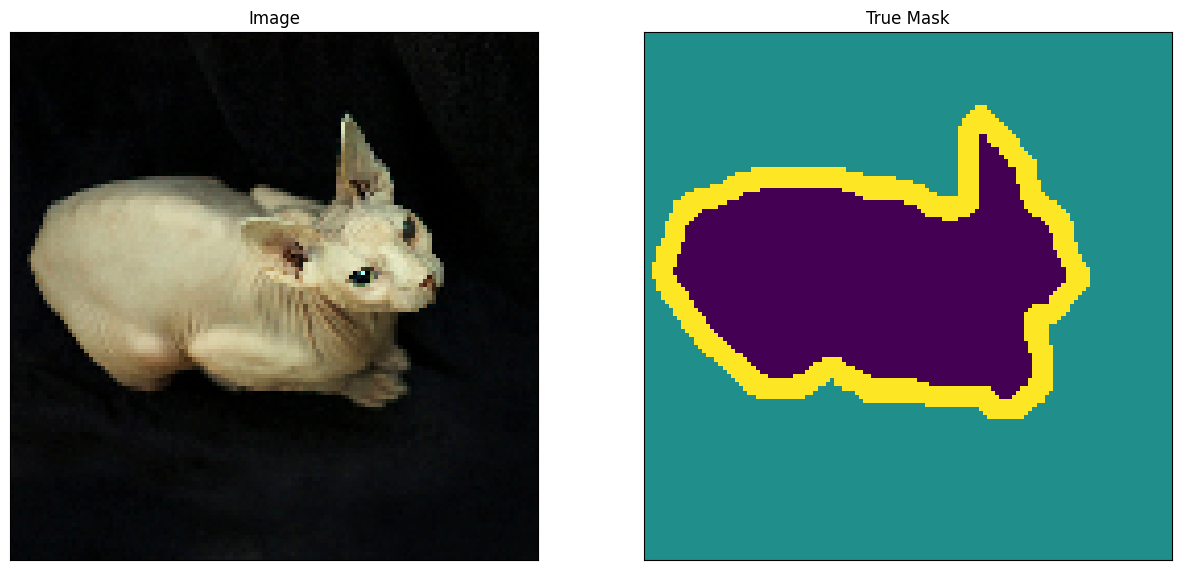

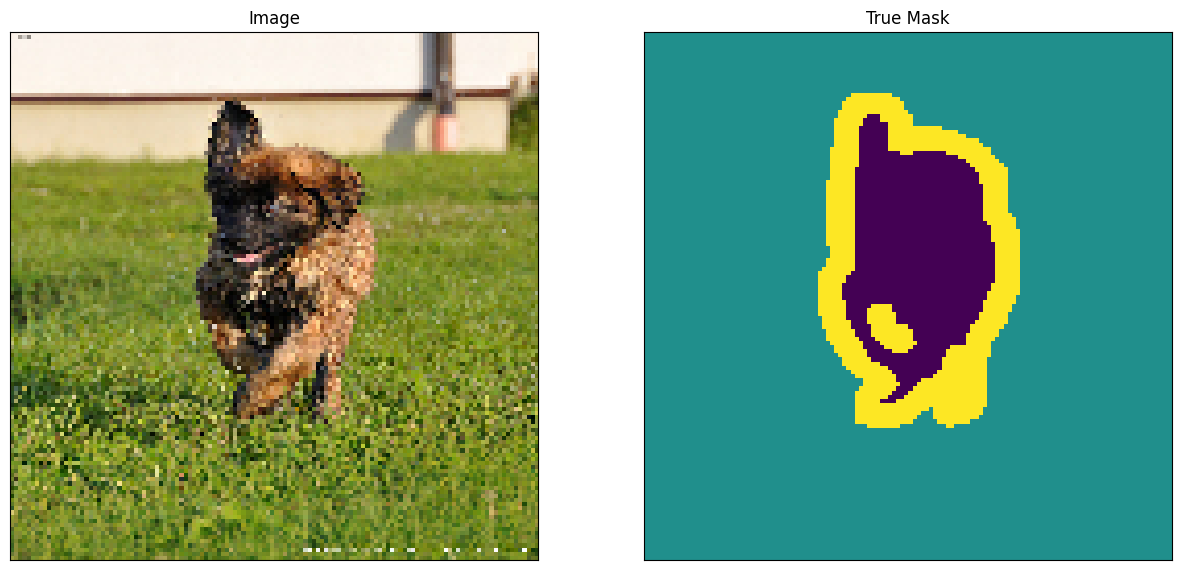

In [13]:
# display an image from the train set
show_image_from_dataset(train)

# display an image from the test set
show_image_from_dataset(test)

In [14]:
# Encoder Utilities

def conv2d_block(input_tensor, n_filters, kernel_size = 3):
  '''
  Adds 2 convolutional layers with the parameters passed to it

  Args:
    input_tensor (tensor) -- the input tensor
    n_filters (int) -- number of filters
    kernel_size (int) -- kernel size for the convolution

  Returns:
    tensor of output features
  '''
  # first layer
  x = input_tensor
  for i in range(2):
    x = tf.keras.layers.Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
            kernel_initializer = 'he_normal', padding = 'same')(x)
    x = tf.keras.layers.Activation('relu')(x)

  return x


def encoder_block(inputs, n_filters=64, pool_size=(2,2), dropout=0.3):
  '''
  Adds two convolutional blocks and then perform down sampling on output of convolutions.

  Args:
    input_tensor (tensor) -- the input tensor
    n_filters (int) -- number of filters
    kernel_size (int) -- kernel size for the convolution

  Returns:
    f - the output features of the convolution block
    p - the maxpooled features with dropout
  '''

  f = conv2d_block(inputs, n_filters=n_filters)
  p = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(f)
  p = tf.keras.layers.Dropout(0.3)(p)

  return f, p


def encoder(inputs):
  '''
  This function defines the encoder or downsampling path.

  Args:
    inputs (tensor) -- batch of input images

  Returns:
    p4 - the output maxpooled features of the last encoder block
    (f1, f2, f3, f4) - the output features of all the encoder blocks
  '''
  f1, p1 = encoder_block(inputs, n_filters=64, pool_size=(2,2), dropout=0.3)
  f2, p2 = encoder_block(p1, n_filters=128, pool_size=(2,2), dropout=0.3)
  f3, p3 = encoder_block(p2, n_filters=256, pool_size=(2,2), dropout=0.3)
  f4, p4 = encoder_block(p3, n_filters=512, pool_size=(2,2), dropout=0.3)

  return p4, (f1, f2, f3, f4)

In [15]:
def bottleneck(inputs):
  '''
  This function defines the bottleneck convolutions to extract more features before the upsampling layers.
  '''

  bottle_neck = conv2d_block(inputs, n_filters=1024)

  return bottle_neck

In [16]:
# Decoder Utilities

def decoder_block(inputs, conv_output, n_filters=64, kernel_size=3, strides=3, dropout=0.3):
  '''
  defines the one decoder block of the UNet

  Args:
    inputs (tensor) -- batch of input features
    conv_output (tensor) -- features from an encoder block
    n_filters (int) -- number of filters
    kernel_size (int) -- kernel size
    strides (int) -- strides for the deconvolution/upsampling
    padding (string) -- "same" or "valid", tells if shape will be preserved by zero padding

  Returns:
    c (tensor) -- output features of the decoder block
  '''
  u = tf.keras.layers.Conv2DTranspose(n_filters, kernel_size, strides = strides, padding = 'same')(inputs)
  c = tf.keras.layers.concatenate([u, conv_output])
  c = tf.keras.layers.Dropout(dropout)(c)
  c = conv2d_block(c, n_filters, kernel_size=3)

  return c


def decoder(inputs, convs, output_channels):
  '''
  Defines the decoder of the UNet chaining together 4 decoder blocks.

  Args:
    inputs (tensor) -- batch of input features
    convs (tuple) -- features from the encoder blocks
    output_channels (int) -- number of classes in the label map

  Returns:
    outputs (tensor) -- the pixel wise label map of the image
  '''

  f1, f2, f3, f4 = convs

  c6 = decoder_block(inputs, f4, n_filters=512, kernel_size=(3,3), strides=(2,2), dropout=0.3)
  c7 = decoder_block(c6, f3, n_filters=256, kernel_size=(3,3), strides=(2,2), dropout=0.3)
  c8 = decoder_block(c7, f2, n_filters=128, kernel_size=(3,3), strides=(2,2), dropout=0.3)
  c9 = decoder_block(c8, f1, n_filters=64, kernel_size=(3,3), strides=(2,2), dropout=0.3)

  outputs = tf.keras.layers.Conv2D(output_channels, (1, 1), activation='softmax')(c9)

  return outputs

In [17]:
OUTPUT_CHANNELS = 3

def unet():
  '''
  Defines the UNet by connecting the encoder, bottleneck and decoder.
  '''

  # specify the input shape
  inputs = tf.keras.layers.Input(shape=(128, 128,3,))

  # feed the inputs to the encoder
  encoder_output, convs = encoder(inputs)

  # feed the encoder output to the bottleneck
  bottle_neck = bottleneck(encoder_output)

  # feed the bottleneck and encoder block outputs to the decoder
  # specify the number of classes via the `output_channels` argument
  outputs = decoder(bottle_neck, convs, output_channels=OUTPUT_CHANNELS)

  # create the model
  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  return model

# instantiate the model
model = unet()

# see the resulting model architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 activation (Activation)     (None, 128, 128, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['activation[0][0]']          
                                                                                              

In [18]:
# configure the optimizer, loss and metrics for training
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# configure the training parameters and train the model

TRAIN_LENGTH = info.splits['train'].num_examples
EPOCHS = 15
VAL_SUBSPLITS = 5
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

# this will take around 20 minutes to run
model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset)

Epoch 1/15
57/57 [==============================] - 126s 1s/step - loss: 1.1072 - accuracy: 0.5701 - val_loss: 0.9047 - val_accuracy: 0.5734
Epoch 2/15
57/57 [==============================] - 84s 1s/step - loss: 0.7534 - accuracy: 0.6913 - val_loss: 0.7350 - val_accuracy: 0.7030
Epoch 3/15
57/57 [==============================] - 61s 1s/step - loss: 0.6752 - accuracy: 0.7260 - val_loss: 0.6451 - val_accuracy: 0.7366
Epoch 4/15
57/57 [==============================] - 59s 1s/step - loss: 0.6284 - accuracy: 0.7450 - val_loss: 0.6096 - val_accuracy: 0.7541
Epoch 5/15
57/57 [==============================] - 59s 1s/step - loss: 0.5750 - accuracy: 0.7724 - val_loss: 0.5326 - val_accuracy: 0.7895
Epoch 6/15
57/57 [==============================] - 61s 1s/step - loss: 0.5755 - accuracy: 0.7719 - val_loss: 0.5325 - val_accuracy: 0.7910
Epoch 7/15
57/57 [==============================] - 59s 1s/step - loss: 0.5119 - accuracy: 0.8002 - val_loss: 0.4862 - val_accuracy: 0.8090
Epoch 8/15
57/57 [=

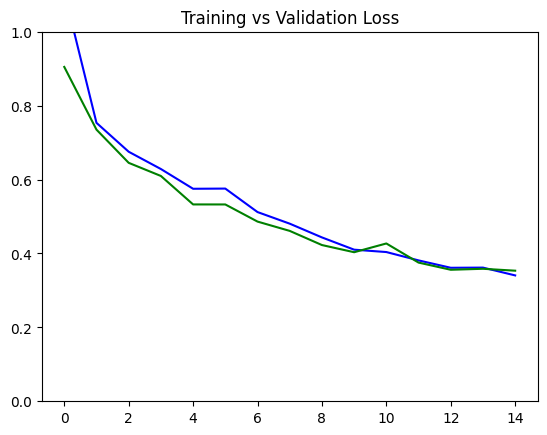

In [20]:
# Plot the training and validation loss
plot_metrics("loss", title="Training vs Validation Loss", ylim=1)

In [21]:
# Prediction Utilities

def get_test_image_and_annotation_arrays():
  '''
  Unpacks the test dataset and returns the input images and segmentation masks
  '''

  ds = test_dataset.unbatch()
  ds = ds.batch(info.splits['test'].num_examples)

  images = []
  y_true_segments = []

  for image, annotation in ds.take(1):
    y_true_segments = annotation.numpy()
    images = image.numpy()

  y_true_segments = y_true_segments[:(info.splits['test'].num_examples - (info.splits['test'].num_examples % BATCH_SIZE))]

  return images[:(info.splits['test'].num_examples - (info.splits['test'].num_examples % BATCH_SIZE))], y_true_segments


def create_mask(pred_mask):
  '''
  Creates the segmentation mask by getting the channel with the highest probability. Remember that we
  have 3 channels in the output of the UNet. For each pixel, the predicition will be the channel with the
  highest probability.
  '''
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0].numpy()


def make_predictions(image, mask, num=1):
  '''
  Feeds an image to a model and returns the predicted mask.
  '''

  image = np.reshape(image,(1, image.shape[0], image.shape[1], image.shape[2]))
  pred_mask = model.predict(image)
  pred_mask = create_mask(pred_mask)

  return pred_mask

# ***Evaluation Metrics - IoU And Dice Coefficients***

In [22]:
def class_wise_metrics(y_true, y_pred):
  class_wise_iou = []
  class_wise_dice_score = []

  smoothening_factor = 0.00001
  for i in range(3):

    intersection = np.sum((y_pred == i) * (y_true == i))
    y_true_area = np.sum((y_true == i))
    y_pred_area = np.sum((y_pred == i))
    combined_area = y_true_area + y_pred_area

    iou = (intersection + smoothening_factor) / (combined_area - intersection + smoothening_factor)
    class_wise_iou.append(iou)

    dice_score =  2 * ((intersection + smoothening_factor) / (combined_area + smoothening_factor))
    class_wise_dice_score.append(dice_score)

  return class_wise_iou, class_wise_dice_score

In [23]:
# Setup the ground truth and predictions.

# get the ground truth from the test set
y_true_images, y_true_segments = get_test_image_and_annotation_arrays()

# feed the test set to th emodel to get the predicted masks
results = model.predict(test_dataset, steps=info.splits['test'].num_examples//BATCH_SIZE)
results = np.argmax(results, axis=3)
results = results[..., tf.newaxis]

57/57 [==============================] - 16s 270ms/step


In [31]:
# compute the class wise metrics
cls_wise_iou, cls_wise_dice_score = class_wise_metrics(y_true_segments, results)

In [32]:
# show the IOU for each class
for idx, iou in enumerate(cls_wise_iou):
  spaces = ' ' * (10-len(class_names[idx]) + 2)
  print("{}{}{} ".format(class_names[idx], spaces, iou))

pet         0.7470372916609196 
background  0.8520413561321202 
outline     0.390710136116327 


In [33]:
# show the Dice Score for each class
for idx, dice_score in enumerate(cls_wise_dice_score):
  spaces = ' ' * (10-len(class_names[idx]) + 2)
  print("{}{}{} ".format(class_names[idx], spaces, dice_score))

pet         0.8552047460313977 
background  0.9201105075878843 
outline     0.5618857962849605 


1/1 [==============================] - 0s 109ms/step


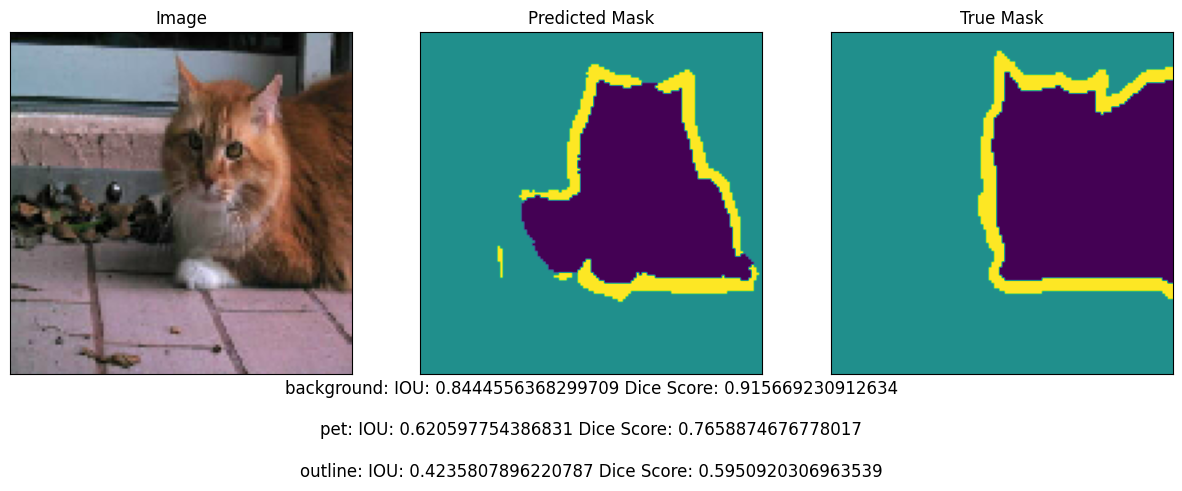

In [34]:
# Please input a number between 0 to 3647 to pick an image from the dataset
integer_slider = 1

# Get the prediction mask
y_pred_mask = make_predictions(y_true_images[integer_slider], y_true_segments[integer_slider])

# Compute the class wise metrics
iou, dice_score = class_wise_metrics(y_true_segments[integer_slider], y_pred_mask)

# Overlay the metrics with the images
display_with_metrics([y_true_images[integer_slider], y_pred_mask, y_true_segments[integer_slider]], iou, dice_score)

1/1 [==============================] - 0s 23ms/step


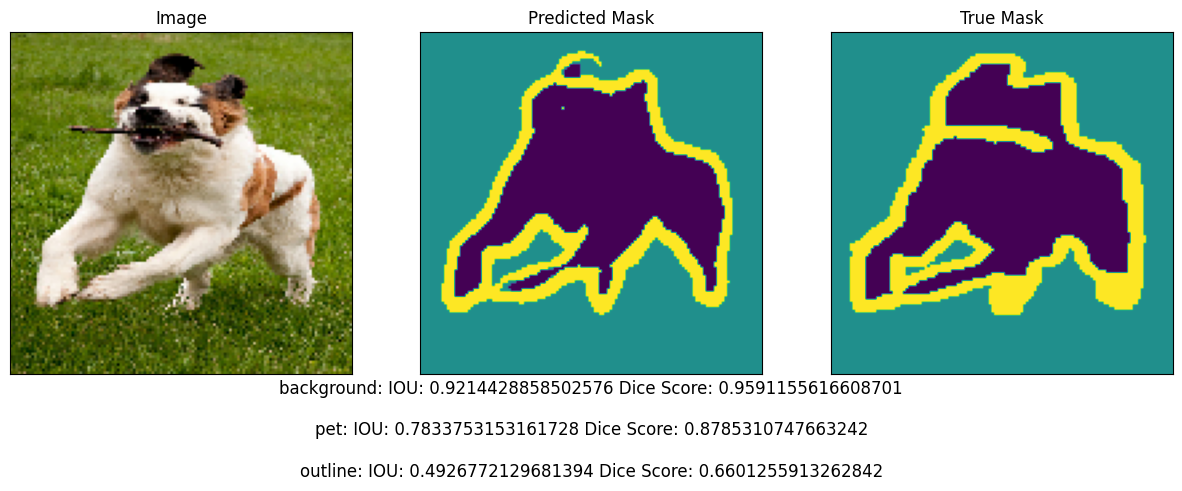

In [28]:
# Please input a number between 0 to 3647 to pick an image from the dataset
integer_slider = 2

# Get the prediction mask
y_pred_mask = make_predictions(y_true_images[integer_slider], y_true_segments[integer_slider])

# Compute the class wise metrics
iou, dice_score = class_wise_metrics(y_true_segments[integer_slider], y_pred_mask)

# Overlay the metrics with the images
display_with_metrics([y_true_images[integer_slider], y_pred_mask, y_true_segments[integer_slider]], iou, dice_score)

# ***Project Reflection:***

My experiential learning journey with the segmentation project using the Oxford IIT Pets dataset has been both rewarding and challenging. Here's a reflection on what worked well, challenges faced, and lessons learned:

**What Worked Well:**

1) Dataset Understanding: Understanding the dataset thoroughly was crucial. Exploring the dataset's structure, labels, and image characteristics helped in devising appropriate preprocessing techniques and segmentation algorithms.

2) Preprocessing Techniques: Implementing preprocessing techniques such as resizing, normalization, and color space conversion proved effective in preparing the dataset for segmentation tasks. These techniques enhanced the model's ability to extract meaningful features.

3) Model Training and Evaluation: Training segmentation models using techniques like K-means clustering and DBSCAN yielded satisfactory results. Evaluating the models using metrics like Jaccard Index or visual inspection provided insights into segmentation performance.

4) Iterative Experimentation: Iterating through different approaches and fine-tuning parameters based on experimentation was valuable. It allowed for continuous improvement and optimization of the segmentation pipeline.



**Challenges Faced:**

1) Complexity of the Dataset: The Oxford IIT Pets dataset contains diverse pet images with variations in pose, lighting, and background clutter. Dealing with such complexity required robust preprocessing and segmentation strategies.

2) Labeling and Annotation: The dataset's labeling and annotation process posed challenges, especially in cases where pets had intricate shapes or occlusions. Ensuring accurate ground truth annotations was crucial for training reliable segmentation models.

3)Computational Resources: Training segmentation models, particularly deep learning-based approaches, often demanded substantial computational resources. Limited access to high-performance hardware or cloud computing platforms may have hindered extensive experimentation.





**Future Steps and Potential Improvements:**

1) Advanced Segmentation Techniques: Exploring advanced segmentation techniques such as U-Net, Mask R-CNN, or DeepLabv3+ could potentially yield more accurate and detailed segmentation results, especially for complex pet images with fine-grained details.

2) Data Augmentation: Augmenting the dataset with techniques like rotation, flipping, and scaling can increase the diversity of training samples and improve model generalization.

3) Transfer Learning: Leveraging pre-trained models on larger datasets like ImageNet and fine-tuning them on the Oxford IIT Pets dataset could boost segmentation performance, particularly in scenarios with limited training data.

4) Ensemble Methods: Implementing ensemble methods by combining multiple segmentation models or techniques could enhance segmentation robustness and mitigate errors.

5) Interactive Segmentation Tools: Developing interactive segmentation tools or user interfaces could facilitate manual correction of segmentation errors and improve overall accuracy.